# Distribuição

Ao visualizarmos uma distribuição, estamos interessados em entender como uma determinada variável é distribuída em um conjunto de dados. Por exemplo, podemos querer visualizar a distribuição da popularidade ou número de seguidores de artistas de sucesso. Uma das formas mais comuns de visualizar informações deste tipo é usando histogramas. No entanto, existem outras visualizações alternativas, incluindo gráficos de densidade e \textit{boxplots}.

In [1]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 6)

In [2]:
# Lendo os dados
df_artistas = pd.read_table('../dataset/spotify_artists_info_complete.tsv',
                            encoding='utf-8')
df_hits = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv',
                        encoding='utf-8')

## Histograma

É uma representação gráfica da distribuição de uma variável numérica. Neste tipo de gráfico, a variável é dividida em várias barras e o número de observações por barra é representado pela altura da barra. Para exemplificar, considere a distribuição da popularidade dos artistas de músicas populares de 2020. Especificamente, para cada artista, plotamos a distribuição da variável `popularity`, dividida por intervalos de tamanho igual a dez. 

In [3]:
# Criando o DataFrame
df = pd.DataFrame({
    'Artista': df_artistas.name,
    'Popularidade': df_artistas.popularity,
})

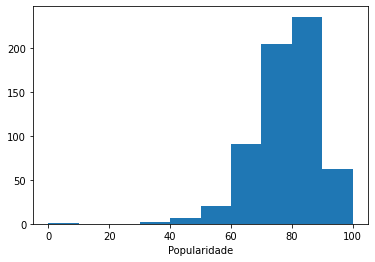

In [4]:
# Criando um histograma simples
fig, ax = plt.subplots()
ax.hist(df["Popularidade"], bins=10)
ax.set_xlabel('Popularidade');

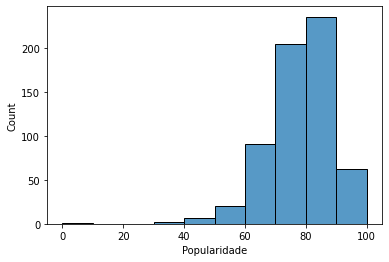

In [5]:
# Criando um histograma simples
sns.histplot(df["Popularidade"],
    kde=False,
    bins=10);

## Gráfico de densidade

Em geral, histogramas são utilizados para visualizar uma única distribuição. No entanto, para visualizar mais de uma distribuição simultaneamente, gráficos de densidade são mais apropriados. Ao contrário dos histogramas, em um gráfico de densidade, a distribuição é visualizada através de uma curva contínua. Essa curva precisa ser estimada a partir dos dados e o método mais comumente usado para esse procedimento de estimativa é chamado de estimativa de densidade de kernel. No exemplo a seguir, utilizamos o kernel gaussiano através do método `seaborn.kdeplot` para estimar a distribuição da popularidade de cada tipo de música presente no nosso conjunto de dados. 

In [6]:
# Criando o DataFrame
df = pd.DataFrame({
    'Popularidade': df_hits.popularity,
    'Tipo de Música': df_hits.song_type,
})

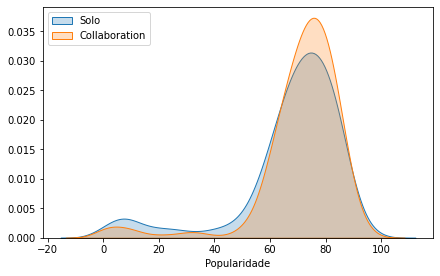

In [7]:
# Plotando duas distribuições em uma mesma figura
fig = sns.kdeplot(df.loc[
    df['Tipo de Música'] == 'Solo', 'Popularidade'
], shade=True, label='Solo')
fig = sns.kdeplot(df.loc[
    df['Tipo de Música'] == 'Collaboration',
    'Popularidade'
], shade=True, label='Collaboration')
plt.xlabel("Popularidade")
plt.ylabel("")
plt.legend(loc='upper left')
plt.gcf().set_size_inches([7, 4.25])

## Boxplots e Gráficos Violino

Assim como os gráficos de densidade, *boxplots* são uma ótima maneira de visualizar distribuições. Em um *boxplot*, os dados são divididos em quartis, fornecendo um bom resumo da distribuição de variáveis numéricas. Este tipo de visualização tem a vantagem de ocupar pouco espaço, o que é útil ao comparar distribuições entre muitos grupos ou conjuntos de dados. No exemplo a seguir, visualizamos as mesmas distribuições do exemplo anterior, porém agora, utilizando o método `seaborn.boxplot`.

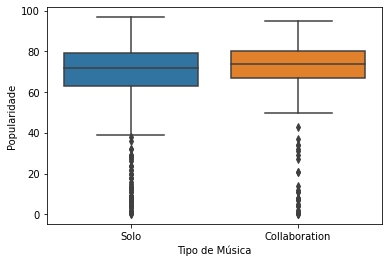

In [8]:
# Criando um boxplot básico
sns.boxplot(x=df["Tipo de Música"], 
    y=df["Popularidade"]);

Uma desvantagem dos boxplots é que ao resumir as distribuições, informações são perdidas. Se considerarmos o *boxplot* anterior, aparentemente, podemos concluir que as colaborações são em média mais populares do que as músicas solo. No entanto, não podemos ver a distribuição subjacente de pontos em cada categoria ou o número de observações. Uma alternativa é utilizar gráficos violino, que descrevem a distribuição permitindo uma compreensão mais profunda da distribuição. No exemplo a seguir, utilizamos o método `seaborn.violinplot` para melhor visualizarmos as distribuições anteriores.

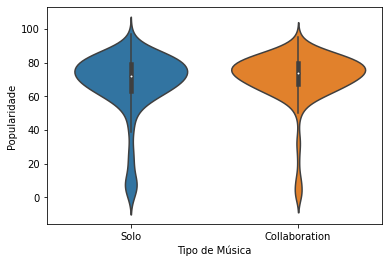

In [9]:
# Criando um gráfico violino
sns.violinplot(x=df["Tipo de Música"], 
    y=df["Popularidade"]);

## Conclusão

Este notebook apresentou como visualizar distribuições

O próximo notebook ([5.3.Correlacao.ipynb](5.3.Correlacao.ipynb)) apresenta como visualizar correlações.